In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import timeit
import copy

In [2]:
pd.set_option('display.max_columns',192)
pd.set_option('display.max_rows',192)
pd.set_option('display.max_colwidth',-1)
#plt.rcParams['figure.figsize']=(84/25.4,55/25.4)

In [3]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1)                                                  
plt.figure(figsize=(3.1, 3)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)



<Figure size 223.2x216 with 0 Axes>

In [4]:
import sys
print("System version:", sys.version)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

System version: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Pandas version: 0.24.2
NumPy version: 1.16.4


## Quick Sort

In [5]:
def quicksort(A):
    _quicksort1(A, 0, len(A) - 1)
    return A

def partition(A, p, r):
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i + 1], A[r] =  A[r], A[i + 1]
    return i + 1

def _quicksort1(A, p, r):
    if p < r:
        q = partition(A, p, r)
        _quicksort1(A, p, q - 1)
        _quicksort1(A, q + 1, r)


## Benchmarking

In [6]:
np.random.seed(12345)
benchmark_results_quick = pd.DataFrame(columns =['input ordering','input size','run number','sorting algorithm','time'])

In [7]:

for input_ordering in ['sorted','reversed','random','identical']:
    
    for input_size in range(1,4):
        
        test_data = np.random.random((10**input_size,))
        
        if input_ordering == 'sorted':
            test_data = sorted(test_data)
        
        elif input_ordering == 'reversed':
            test_data = list(reversed(sorted(test_data)))
        
        elif input_ordering == 'identical':
            test_data =  [test_data]*0
            
        clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': quicksort,
                              'data': test_data,
                              'copy': copy.copy})
        n_ar, t_ar = clock.autorange()
        t = clock.repeat(repeat=5, number=n_ar)  
        
        print(f"Quick sort minimum time on {input_ordering} data of size 10^{input_size}:", min(t)/n_ar)
        
        
        for run_number in range(5):
            benchmark_results_quick = benchmark_results_quick.append({'input ordering': input_ordering,
                                                          
                                                         'input size':10**input_size,
                                                          'run number':run_number+1,
                                                          'sorting algorithm':'Quicksort',
                                                          'time':t[run_number]/n_ar},
                                                             ignore_index=True)
        

Quick sort minimum time on sorted data of size 10^1: 1.3685840000000039e-05
Quick sort minimum time on sorted data of size 10^2: 0.0007575597999999992
Quick sort minimum time on sorted data of size 10^3: 0.07706708000000013
Quick sort minimum time on reversed data of size 10^1: 1.1581765000000033e-05
Quick sort minimum time on reversed data of size 10^2: 0.000746368799999999
Quick sort minimum time on reversed data of size 10^3: 0.06199364000000003
Quick sort minimum time on random data of size 10^1: 1.8023630000000068e-05
Quick sort minimum time on random data of size 10^2: 0.0003195116999999996
Quick sort minimum time on random data of size 10^3: 0.0059594180000000566
Quick sort minimum time on identical data of size 10^1: 6.359487999999942e-07
Quick sort minimum time on identical data of size 10^2: 6.406221999999957e-07
Quick sort minimum time on identical data of size 10^3: 4.848920000000021e-07


In [8]:
benchmark_results_quick.to_pickle("./benchmark_results_quick.pkl")

In [9]:
pd.read_pickle("./benchmark_results_quick.pkl")

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Quicksort,2.097347e-05
1,sorted,10,2,Quicksort,1.735979e-05
2,sorted,10,3,Quicksort,1.368584e-05
3,sorted,10,4,Quicksort,1.972732e-05
4,sorted,10,5,Quicksort,2.310066e-05
5,sorted,100,1,Quicksort,7.756160e-04
6,sorted,100,2,Quicksort,7.582034e-04
7,sorted,100,3,Quicksort,7.742876e-04
8,sorted,100,4,Quicksort,7.807454e-04
9,sorted,100,5,Quicksort,7.575598e-04


Text(0.5, 1.0, 'Quicksort')

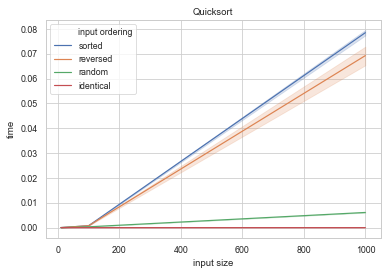

In [10]:
ax = sns.lineplot(x="input size", y="time", data=benchmark_results_quick, hue ='input ordering')
plt.title('Quicksort')

## Heap Sort

In [11]:
# Python program for implementation of heap Sort 
  
# To heapify subtree rooted at index i. 
# n is size of heap 
def heapify(arr, n, i): 
    largest = i  # Initialize largest as root 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i] < arr[l]: 
        largest = l 
  
    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest] < arr[r]: 
        largest = r 
  
    # Change root, if needed 
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i]  # swap 
  
        # Heapify the root. 
        heapify(arr, n, largest) 
        
## main function to sort given array       
def sort_heap(arr): 
    n = len(arr) 
  
    # Build a maxheap. 
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i]   # swap 
        heapify(arr, i, 0) 
        
    return arr

 ## Benchmarking

In [12]:
np.random.seed(12345)
benchmark_results_heap = pd.DataFrame(columns =['input ordering','input size','run number','sorting algorithm','time'])

In [13]:

for input_ordering in ['sorted','reversed','random','identical']:
    
    for input_size in range(1,4):
        
        test_data = np.random.random((10**input_size,))
        
        if input_ordering == 'sorted':
            test_data = sorted(test_data)
        
        elif input_ordering == 'reversed':
            test_data = list(reversed(sorted(test_data)))
        
        elif input_ordering == 'identical':
            test_data =  [test_data]*0
            
        clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': sort_heap,
                              'data': test_data,
                              'copy': copy.copy})
        n_ar, t_ar = clock.autorange()
        t = clock.repeat(repeat=5, number=n_ar)  
        
        print(f"Heap sort minimum time on {input_ordering} data of size 10^{input_size}:", min(t)/n_ar)
       
        for run_number in range(5):
            benchmark_results_heap = benchmark_results_heap.append({'input ordering': input_ordering,
                                                          
                                                         'input size':10**input_size,
                                                          'run number':run_number+1,
                                                          'sorting algorithm':'Heap Sort',
                                                          'time':t[run_number]/n_ar},
                                                        ignore_index=True)
        

Heap sort minimum time on sorted data of size 10^1: 2.14914499999999e-05
Heap sort minimum time on sorted data of size 10^2: 0.00040161799999999915
Heap sort minimum time on sorted data of size 10^3: 0.006292038000000133
Heap sort minimum time on reversed data of size 10^1: 1.729150500000003e-05
Heap sort minimum time on reversed data of size 10^2: 0.0003309010000000043
Heap sort minimum time on reversed data of size 10^3: 0.003974001999999928
Heap sort minimum time on random data of size 10^1: 3.539817999999997e-05
Heap sort minimum time on random data of size 10^2: 0.0007141139999999951
Heap sort minimum time on random data of size 10^3: 0.011186195000000154
Heap sort minimum time on identical data of size 10^1: 1.4429129999999902e-06
Heap sort minimum time on identical data of size 10^2: 1.4334965000000111e-06
Heap sort minimum time on identical data of size 10^3: 1.469344000000028e-06


In [14]:
benchmark_results_heap.to_pickle("./benchmark_results_heap.pkl")

In [15]:
pd.read_pickle("./benchmark_results_heap.pkl")

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Heap Sort,0.000021
1,sorted,10,2,Heap Sort,0.000023
2,sorted,10,3,Heap Sort,0.000025
3,sorted,10,4,Heap Sort,0.000027
4,sorted,10,5,Heap Sort,0.000023
5,sorted,100,1,Heap Sort,0.000430
6,sorted,100,2,Heap Sort,0.000415
7,sorted,100,3,Heap Sort,0.000402
8,sorted,100,4,Heap Sort,0.000440
9,sorted,100,5,Heap Sort,0.000402


Text(0.5, 1.0, 'Heapsort')

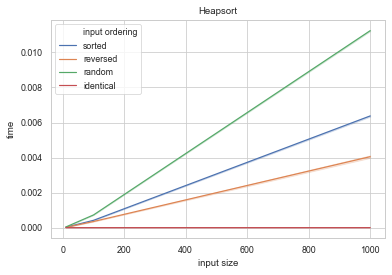

In [16]:
ax = sns.lineplot(x="input size", y="time", data=benchmark_results_heap, hue ='input ordering')
plt.title("Heapsort")

## Merge Sort

In [17]:
def merge_sort(data):
   
    if len(data) > 1:
        
        mid = int(len(data)/2)
        lefthalf = data[:mid]
        righthalf = data[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i=0
        j=0
        k=0
        
        while i<len(lefthalf) and j<len(righthalf):
            
            if lefthalf[i]<righthalf[j]:
                data[k] = lefthalf[i]
                
                i+=1
                
            else:
                data[k]= righthalf[j]
                j+=1
                
            k+=1
            
        while i<len(lefthalf):
            data[k] = lefthalf[i]
            i+=1
            k+=1
            
        while j<len(righthalf):
            data[k] = righthalf[j]
            j= j+1
            k= k+1
            
        return data
            
            

In [18]:
np.random.seed(12345)
benchmark_results_merge = pd.DataFrame(columns =['input ordering','input size','run number','sorting algorithm','time'])

In [19]:

for input_ordering in ['sorted','reversed','random','identical']:
    
    for input_size in range(1,4):
        
        test_data = np.random.random((10**input_size,))
        
        if input_ordering == 'sorted':
            test_data = sorted(test_data)
        
        elif input_ordering == 'reversed':
            test_data = list(reversed(sorted(test_data)))
        
        elif input_ordering == 'identical':
            test_data =  [test_data]*0
            
        clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': merge_sort,
                              'data': test_data,
                              'copy': copy.copy})
        n_ar, t_ar = clock.autorange()
        t = clock.repeat(repeat=5, number=n_ar)  
        
        print(f"Merge Sort minimum time on {input_ordering} data of size 10^{input_size}:", min(t)/n_ar)
        
        
        for run_number in range(5):
            benchmark_results_merge = benchmark_results_merge.append({'input ordering': input_ordering,
                                                          
                                                         'input size':10**input_size,
                                                          'run number':run_number+1,
                                                          'sorting algorithm':'Merge Sort',
                                                          'time':t[run_number]/n_ar},
                                                        ignore_index=True)
        

Merge Sort minimum time on sorted data of size 10^1: 1.542454999999947e-05
Merge Sort minimum time on sorted data of size 10^2: 0.00022114309999999904
Merge Sort minimum time on sorted data of size 10^3: 0.0029231199999999544
Merge Sort minimum time on reversed data of size 10^1: 2.0133969999999836e-05
Merge Sort minimum time on reversed data of size 10^2: 0.00030290150000000435
Merge Sort minimum time on reversed data of size 10^3: 0.00382373599999994
Merge Sort minimum time on random data of size 10^1: 3.368130000000065e-05
Merge Sort minimum time on random data of size 10^2: 0.0005428345999999919
Merge Sort minimum time on random data of size 10^3: 0.007484257999999784
Merge Sort minimum time on identical data of size 10^1: 3.9917700000000876e-07
Merge Sort minimum time on identical data of size 10^2: 5.01817399999993e-07
Merge Sort minimum time on identical data of size 10^3: 3.9967719999998507e-07


In [20]:
benchmark_results_merge.to_pickle("./benchmark_results_merge.pkl")

In [21]:
pd.read_pickle("./benchmark_results_merge.pkl")

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Merge Sort,2.000951e-05
1,sorted,10,2,Merge Sort,2.002259e-05
2,sorted,10,3,Merge Sort,1.964431e-05
3,sorted,10,4,Merge Sort,1.542455e-05
4,sorted,10,5,Merge Sort,1.568088e-05
5,sorted,100,1,Merge Sort,2.211431e-04
6,sorted,100,2,Merge Sort,2.317387e-04
7,sorted,100,3,Merge Sort,2.224103e-04
8,sorted,100,4,Merge Sort,2.213802e-04
9,sorted,100,5,Merge Sort,2.212781e-04


Text(0.5, 1.0, 'Merge Sort')

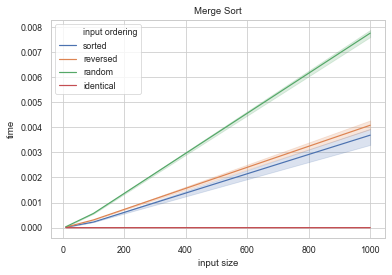

In [22]:
ax = sns.lineplot(x="input size", y="time", data=benchmark_results_merge, hue ='input ordering')
plt.title("Merge Sort")

### Benchmarking of python sort function

In [23]:
np.random.seed(12345)
benchmark_results_python = pd.DataFrame(columns =['input ordering','input size','run number','sorting algorithm','time'])

In [24]:

for input_ordering in ['sorted','reversed','random','identical']:
    
    for input_size in range(1,4):
        
        test_data = np.random.random((10**input_size,))
        
        if input_ordering == 'sorted':
            test_data = sorted(test_data)
        
        elif input_ordering == 'reversed':
            test_data = list(reversed(sorted(test_data)))
        
        elif input_ordering == 'identical':
            test_data =  [test_data]*0
            
        clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': sorted,
                              'data': test_data,
                              'copy': copy.copy})
        n_ar, t_ar = clock.autorange()
        t = clock.repeat(repeat=5, number=n_ar)  
        
        print(f"Python sort function minimum time on {input_ordering} data of size 10^{input_size}:", min(t)/n_ar)
        
        for run_number in range(5):
            benchmark_results_python = benchmark_results_python.append({'input ordering': input_ordering,
                                                          
                                                         'input size':10**input_size,
                                                          'run number':run_number+1,
                                                          'sorting algorithm':'Python Sort',
                                                          'time':t[run_number]/n_ar},
                                                             ignore_index=True)
        

Python sort function minimum time on sorted data of size 10^1: 6.740130000000022e-07
Python sort function minimum time on sorted data of size 10^2: 3.082285999999925e-06
Python sort function minimum time on sorted data of size 10^3: 2.3905369999999947e-05
Python sort function minimum time on reversed data of size 10^1: 7.727615999999955e-07
Python sort function minimum time on reversed data of size 10^2: 2.93365399999999e-06
Python sort function minimum time on reversed data of size 10^3: 2.314018999999945e-05
Python sort function minimum time on random data of size 10^1: 3.2139979999999466e-06
Python sort function minimum time on random data of size 10^2: 2.288554000000005e-05
Python sort function minimum time on random data of size 10^3: 0.000307295400000001
Python sort function minimum time on identical data of size 10^1: 3.9024839999999016e-07
Python sort function minimum time on identical data of size 10^2: 5.49574199999995e-07
Python sort function minimum time on identical data o

In [25]:
benchmark_results_python.to_pickle("./benchmark_results_python.pkl")

In [26]:
pd.read_pickle("./benchmark_results_python.pkl")

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Python Sort,7.260674e-07
1,sorted,10,2,Python Sort,6.781204e-07
2,sorted,10,3,Python Sort,6.740130e-07
3,sorted,10,4,Python Sort,6.883240e-07
4,sorted,10,5,Python Sort,6.830742e-07
5,sorted,100,1,Python Sort,3.100845e-06
6,sorted,100,2,Python Sort,3.082286e-06
7,sorted,100,3,Python Sort,3.123724e-06
8,sorted,100,4,Python Sort,3.119063e-06
9,sorted,100,5,Python Sort,3.123107e-06


Text(0.5, 1.0, 'Python Sort')

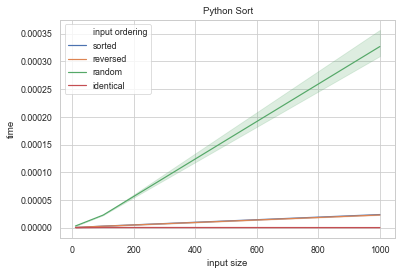

In [27]:
ax = sns.lineplot(x="input size", y="time", data=benchmark_results_python, hue ='input ordering')
plt.title("Python Sort")

## Numpy Sort

In [28]:
def numpy_sort(data):
    return np.sort(data)

In [29]:
np.random.seed(12345)
benchmark_results_numpy = pd.DataFrame(columns =['input ordering','input size', 'sorting algorithm','time'])

In [30]:
list_min_times = []

for input_ordering in ['sorted','reversed','random','identical']:
    
    for input_size in range(1,4):
        
        test_data = np.random.random((10**input_size,))
        
        if input_ordering == 'sorted':
            test_data = sorted(test_data)
        
        elif input_ordering == 'reversed':
            test_data = list(reversed(sorted(test_data)))
        
        elif input_ordering == 'identical':
            test_data =  [test_data]*0
            
        clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': numpy_sort,
                              'data': test_data,
                              'copy': copy.copy})
        n_ar, t_ar = clock.autorange()
        t = clock.repeat(repeat=5, number=n_ar)
        min_time = min(t)/n_ar
        list_min_times.append(min_time)
        
        print(f"Numpy sort function minimum time on {input_ordering} data of size 10^{input_size}:", min_time)
        
        benchmark_results_numpy = benchmark_results_numpy.append({'input ordering': input_ordering,
                                                     'input size':10**input_size,
                                                      'sorting algorithm':'NumPy-sort',
                                                      'time':min_time},
                                                         ignore_index=True)


Numpy sort function minimum time on sorted data of size 10^1: 4.331252000000063e-06
Numpy sort function minimum time on sorted data of size 10^2: 1.0201879999999619e-05
Numpy sort function minimum time on sorted data of size 10^3: 6.983271999999943e-05
Numpy sort function minimum time on reversed data of size 10^1: 4.169695999999874e-06
Numpy sort function minimum time on reversed data of size 10^2: 1.0363430000000307e-05
Numpy sort function minimum time on reversed data of size 10^3: 7.264860000000226e-05
Numpy sort function minimum time on random data of size 10^1: 2.9165629999999964e-06
Numpy sort function minimum time on random data of size 10^2: 4.0036139999998e-06
Numpy sort function minimum time on random data of size 10^3: 2.9969859999999925e-05
Numpy sort function minimum time on identical data of size 10^1: 3.0868440000000417e-06
Numpy sort function minimum time on identical data of size 10^2: 3.119679000000133e-06
Numpy sort function minimum time on identical data of size 10

In [31]:
benchmark_results_numpy.to_pickle("./benchmark_results_numpy.pkl")

In [32]:
pd.read_pickle("./benchmark_results_numpy.pkl")

,input ordering,input size,sorting algorithm,time
0,sorted,10,NumPy-sort,0.000004
1,sorted,100,NumPy-sort,0.000010
2,sorted,1000,NumPy-sort,0.000070
3,reversed,10,NumPy-sort,0.000004
4,reversed,100,NumPy-sort,0.000010
5,reversed,1000,NumPy-sort,0.000073
6,random,10,NumPy-sort,0.000003
7,random,100,NumPy-sort,0.000004
8,random,1000,NumPy-sort,0.000030
9,identical,10,NumPy-sort,0.000003


Text(0.5, 1.0, 'Numpy Sort')

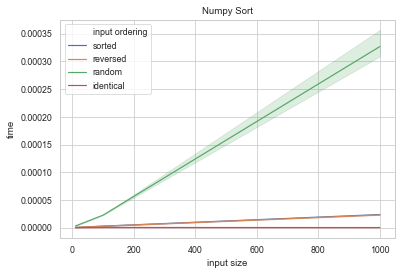

In [33]:
ax = sns.lineplot(x="input size", y="time", data=benchmark_results_python, hue ='input ordering')
plt.title('Numpy Sort')

# Combined Dataframe

In [34]:
frames = [ benchmark_results_heap, benchmark_results_merge, benchmark_results_numpy, benchmark_results_python, benchmark_results_quick]

In [35]:
combined = pd.concat(frames, axis =0)

C:\Users\Ashesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [36]:
combined

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Heap Sort,2.149145e-05
1,sorted,10,2,Heap Sort,2.336455e-05
2,sorted,10,3,Heap Sort,2.501468e-05
3,sorted,10,4,Heap Sort,2.664948e-05
4,sorted,10,5,Heap Sort,2.343082e-05
5,sorted,100,1,Heap Sort,4.297340e-04
6,sorted,100,2,Heap Sort,4.145562e-04
7,sorted,100,3,Heap Sort,4.022442e-04
8,sorted,100,4,Heap Sort,4.401414e-04
9,sorted,100,5,Heap Sort,4.016180e-04


# Plot for Sorted Data

In [37]:
df_sorted = combined[combined['input ordering'] == 'sorted']

In [38]:
df_sorted

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Heap Sort,2.149145e-05
1,sorted,10,2,Heap Sort,2.336455e-05
2,sorted,10,3,Heap Sort,2.501468e-05
3,sorted,10,4,Heap Sort,2.664948e-05
4,sorted,10,5,Heap Sort,2.343082e-05
5,sorted,100,1,Heap Sort,4.297340e-04
6,sorted,100,2,Heap Sort,4.145562e-04
7,sorted,100,3,Heap Sort,4.022442e-04
8,sorted,100,4,Heap Sort,4.401414e-04
9,sorted,100,5,Heap Sort,4.016180e-04


Text(0.5, 1.0, 'Sorted Data')

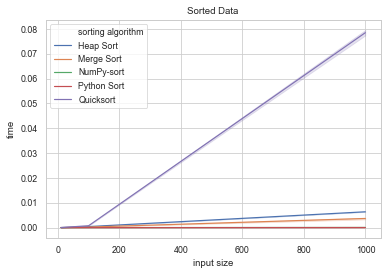

In [39]:
sns.lineplot(x='input size', y='time', hue='sorting algorithm', data=df_sorted)
plt.title("Sorted Data")

## Plot for reversed data

Text(0.5, 1.0, 'Reversed Data')

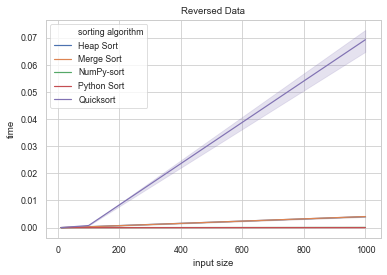

In [40]:
df_reversed = combined[combined['input ordering'] == 'reversed']
sns.lineplot(x='input size', y='time', hue='sorting algorithm', data=df_reversed)
plt.title("Reversed Data")

## Plot for random data

Text(0.5, 1.0, 'Random Data')

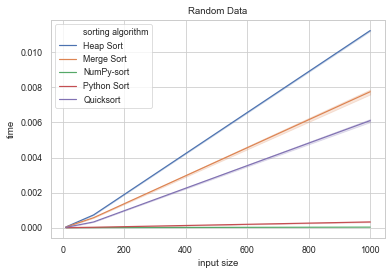

In [41]:
df_random = combined[combined['input ordering'] == 'random']
sns.lineplot(x='input size', y='time', hue='sorting algorithm', data=df_random)
plt.title("Random Data")

## Plot for Identical data

Text(0.5, 1.0, 'Identical Data')

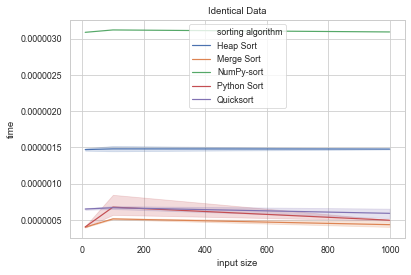

In [42]:
df_identical = combined[combined['input ordering'] == 'identical']
sns.lineplot(x='input size', y='time', hue='sorting algorithm', data=df_identical)
plt.title("Identical Data")

In [2]:
less = pd.read_csv("aa.csv")

In [6]:
newless=less.drop(columns=['Unnamed: 1'])

In [10]:
with open('mytable1.tex','w') as tf:
    tf.write(newless.to_latex())